In [1]:
## import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics


In [2]:
## loading the data 
data = pd.read_csv("M1_final.csv")
data.head()


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [3]:
## info about the data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [4]:
## any null values? a double check 
data.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [5]:
## replace missing values 
mode = data["Wind"].mode().values[0]
data["Wind"].fillna(mode, inplace = True)

In [6]:
## change object to integer for dew point as has numeric values 
data["Dew Point"] = data["Dew Point"].astype(str).astype(int)

In [7]:
## any null values?
data.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 0
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [8]:
## what correlation is there between the data?
corr_flights = data.corr(numeric_only= True)
corr_flights

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
MONTH,1.000000,-0.007254,0.029365,0.046455,-0.016052,-0.000144,0.001824,0.002632,-0.012361,0.135682,0.135040,0.012515,-0.035097,-0.051014,-0.085274,-0.006191,-0.019705,0.018505
DAY_OF_MONTH,-0.007254,1.000000,-0.029732,-0.036618,0.002761,-0.002762,0.001754,0.004446,0.008519,-0.132457,-0.040129,0.096215,-0.093211,-0.088991,0.016871,-0.003417,0.002223,-0.023990
DAY_OF_WEEK,0.029365,-0.029732,1.000000,-0.006203,0.000413,0.002450,0.005411,0.008256,-0.003339,0.013081,-0.073816,0.001627,0.095943,0.127689,0.102289,0.024415,0.009621,0.028388
DEP_DELAY,0.046455,-0.036618,-0.006203,1.000000,-0.030871,-0.031507,0.102384,0.072340,0.043691,-0.032261,-0.000013,-0.011776,0.067718,0.044340,-0.064939,-0.065452,-0.006949,0.034881
CRS_ELAPSED_TIME,-0.016052,0.002761,0.000413,-0.030871,1.000000,0.994465,-0.031332,-0.021391,0.035186,-0.016050,0.007246,0.017198,-0.013440,-0.011934,0.010165,0.083426,-0.067669,0.070838
DISTANCE,-0.000144,-0.002762,0.002450,-0.031507,0.994465,1.000000,-0.040963,-0.034604,0.008520,-0.009923,0.009789,0.015110,-0.010734,-0.009522,0.005692,0.059174,-0.088793,0.059856
CRS_DEP_M,0.001824,0.001754,0.005411,0.102384,-0.031332,-0.040963,1.000000,0.946023,0.452476,0.086371,0.001578,0.003843,0.008063,-0.009887,-0.008285,-0.025621,0.495286,0.044864
DEP_TIME_M,0.002632,0.004446,0.008256,0.072340,-0.021391,-0.034604,0.946023,1.000000,0.469758,0.098105,0.008907,-0.005923,0.006033,-0.014336,-0.009410,0.025609,0.544197,0.057896
CRS_ARR_M,-0.012361,0.008519,-0.003339,0.043691,0.035186,0.008520,0.452476,0.469758,1.000000,0.101620,-0.000442,-0.033163,0.014180,0.004486,-0.012682,0.149903,0.424209,0.071377
Temperature,0.135682,-0.132457,0.013081,-0.032261,-0.016050,-0.009923,0.086371,0.098105,0.101620,1.000000,0.787864,0.054401,0.010603,-0.039487,-0.376730,-0.022534,0.075958,-0.067574


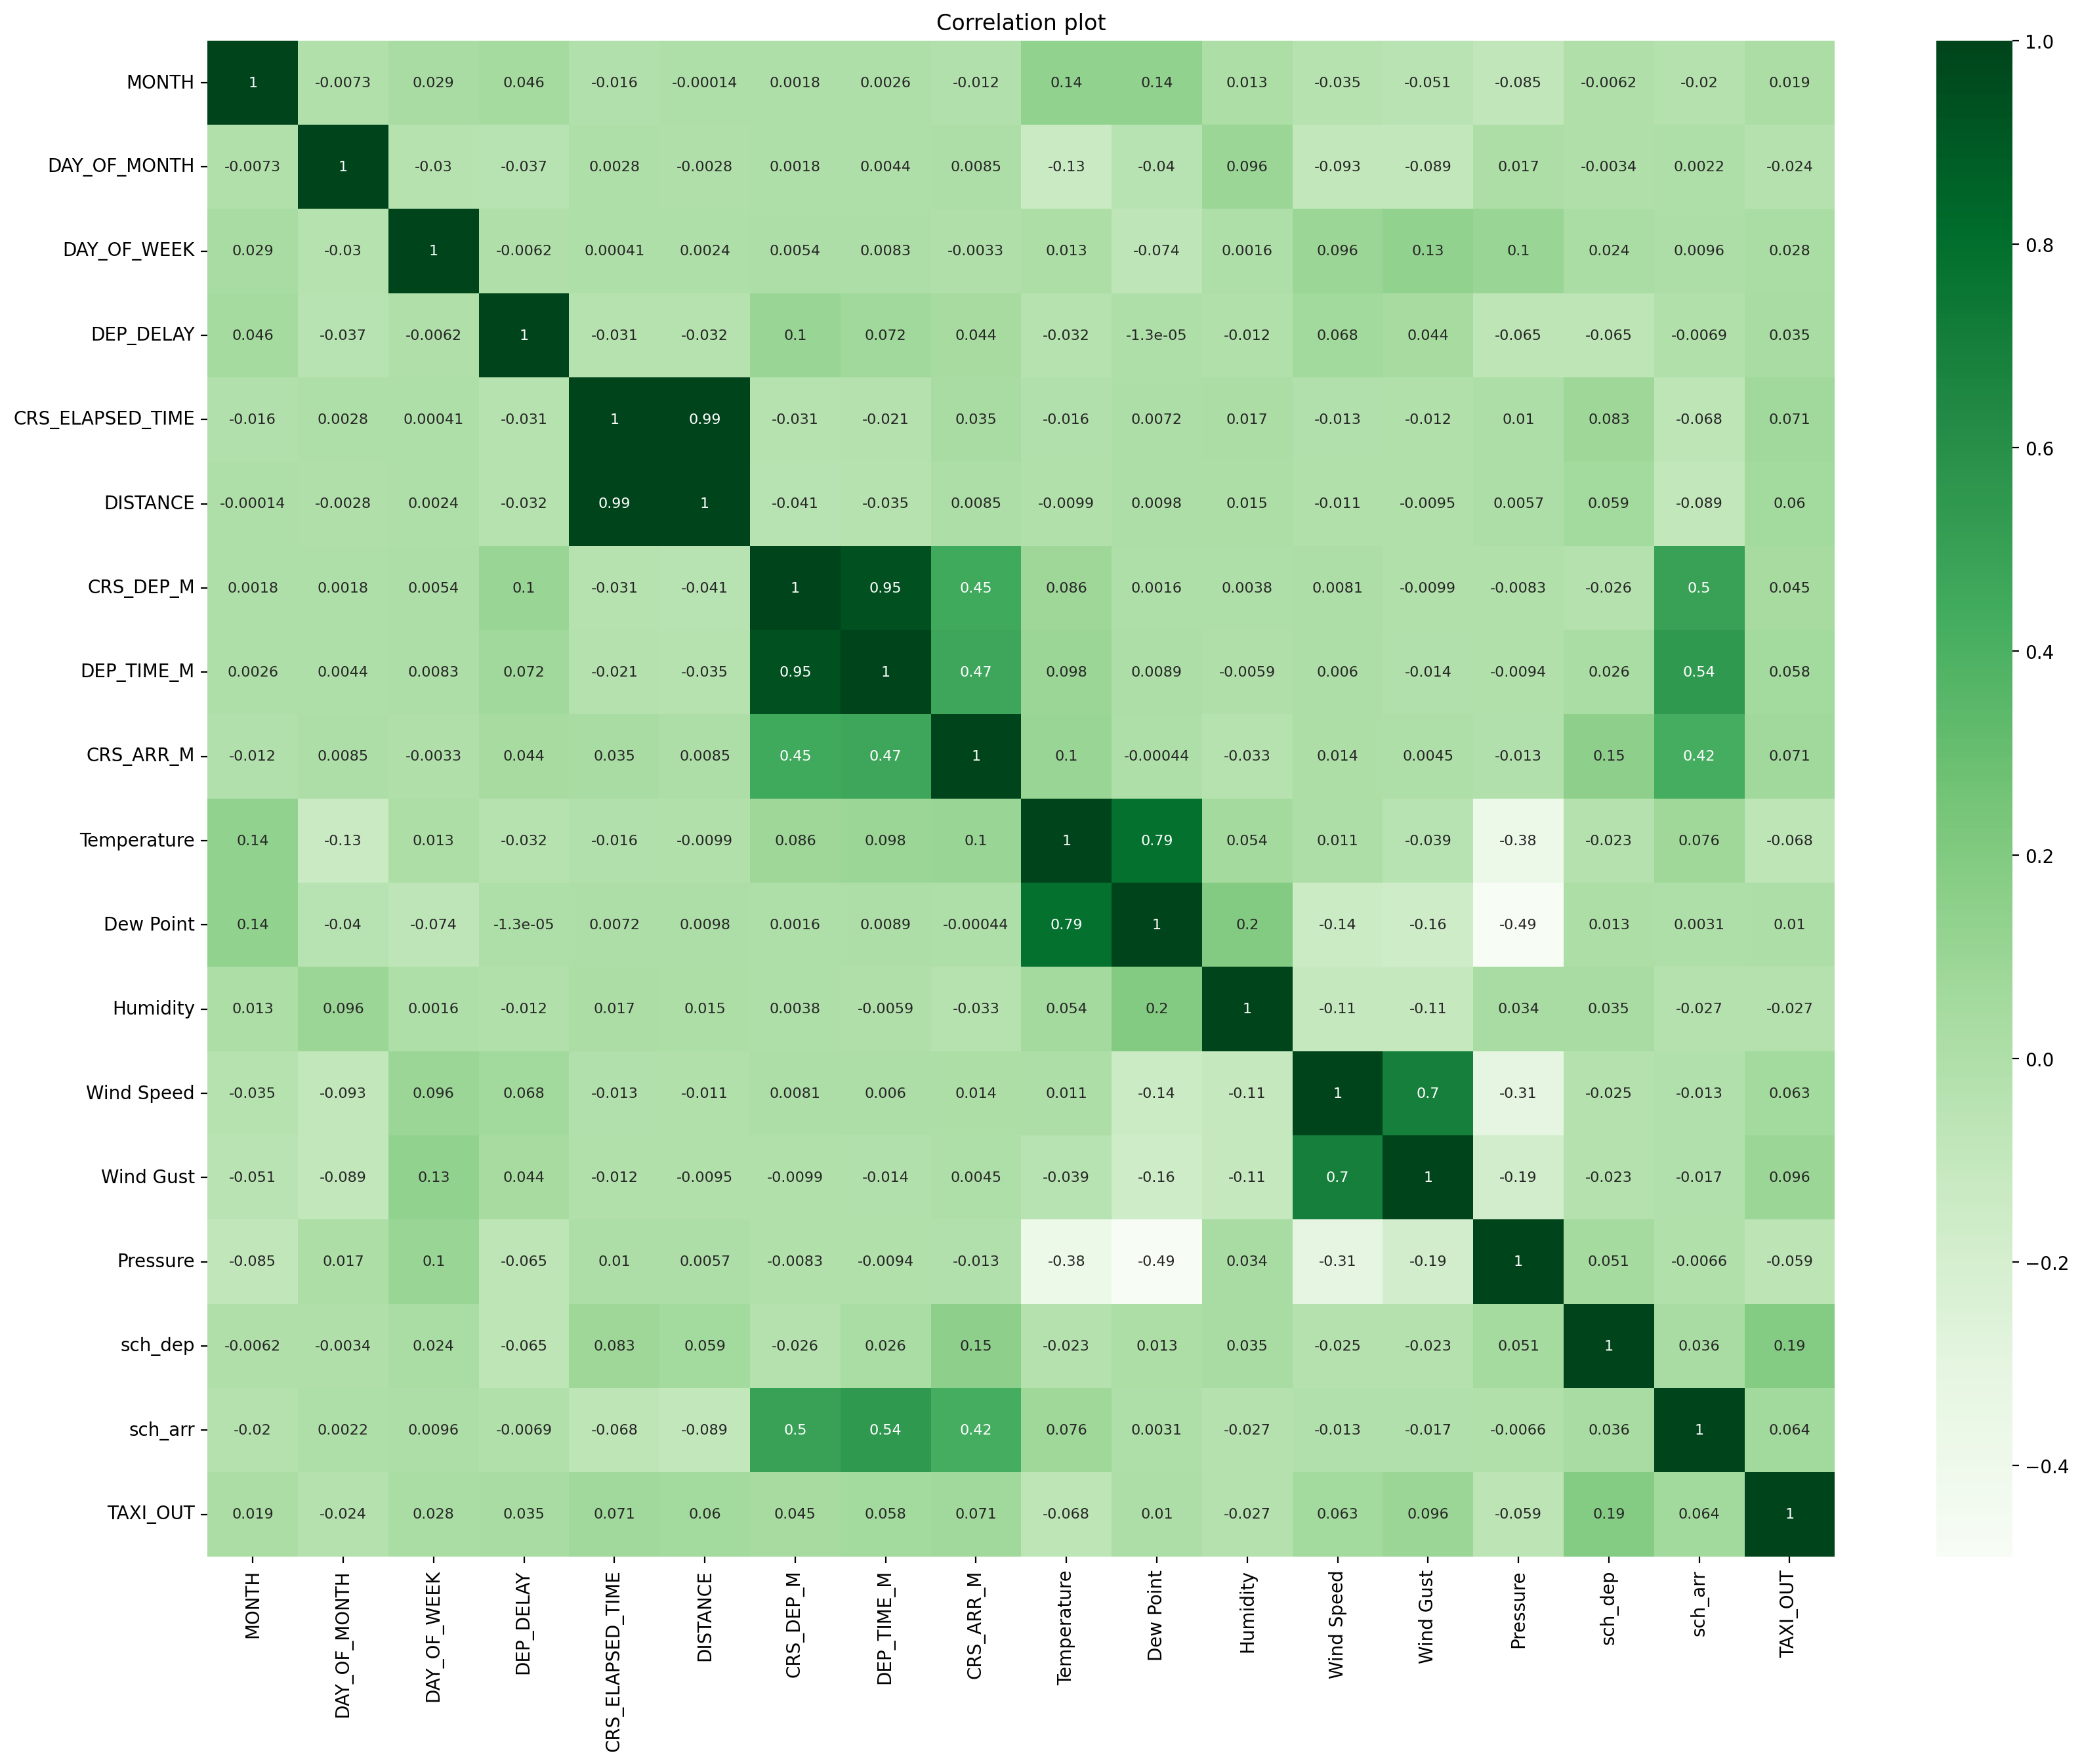

In [23]:
## heatmap 
plt.figure(figsize=(20,15))
sns.heatmap(corr_flights, annot= True, annot_kws={"size" : 8}, cmap = "Greens")
plt.title('Correlation plot', loc = "center")
plt.show()
%config InlineBackend.figure_format='retina'

In [10]:
## descriptive statistics 
data.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,30.420819,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,12.314083,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,-3.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,23.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,31.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,39.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,67.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


In [11]:
## selecting the dependant and independant variable 
data_numeric_only = data.select_dtypes(include=np.number)
x = data_numeric_only.iloc[:, 3:-1].values
y = data["TAXI_OUT"].values

In [12]:
x

array([[-1.000e+00,  1.240e+02,  6.360e+02, ...,  2.986e+01,  9.000e+00,
         1.700e+01],
       [-7.000e+00,  3.710e+02,  2.475e+03, ...,  2.986e+01,  9.000e+00,
         1.700e+01],
       [ 4.000e+01,  1.810e+02,  1.069e+03, ...,  2.986e+01,  9.000e+00,
         1.700e+01],
       ...,
       [ 2.830e+02,  3.920e+02,  2.422e+03, ...,  3.018e+01,  1.900e+01,
         2.300e+01],
       [ 5.000e+00,  2.240e+02,  1.598e+03, ...,  3.018e+01,  1.900e+01,
         2.300e+01],
       [-1.000e+00,  2.250e+02,  1.576e+03, ...,  3.018e+01,  1.900e+01,
         2.300e+01]])

In [13]:
y

array([14, 15, 22, ..., 21, 13, 15])

In [14]:
## data splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 35)

In [15]:
## standardisation
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [16]:
## build the linear regression model 
LR = LinearRegression()
LR.fit(x_train,y_train)


LinearRegression()

In [17]:
## prediction
y_pred = LR.predict(x_test)
y_pred

array([17.70024594, 19.95706969, 20.27715286, ..., 22.01287252,
       18.90638613, 23.8213612 ])

In [18]:
## creating a dataframe that allows you to see the taxi out actual and predicted side by side 
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
0,14,17.700246
1,17,19.957070
2,9,20.277153
3,14,21.857498
4,36,19.155858
...,...,...
8641,22,21.442716
8642,32,22.212777
8643,12,22.012873
8644,21,18.906386


In [19]:
## metric in regression
## RSQUARED 0 --is not good, 1-- good ----
## MEAN ABSOLUTE ERROR -- average absolute value between actual values and predicted values
## MEAN SQUARED ERROR -- measure the average squraed differneces between the actual and the predicted values 
##ROOT MEAN SQUARED ERROR --- is just the square root of the mean square error

In [20]:
## what is the accuracy of our model as a %? using RSquared 
from sklearn.metrics import r2_score
R_squared = r2_score(df["Actual"], df["Predicted"])
print("The accuracy of our model is {}%".format(round(R_squared, 2) *100))

The accuracy of our model is 8.0%


In [21]:
## is our model correctly predicting? using MAE
from sklearn.metrics import mean_absolute_error
meanAbError = mean_absolute_error(df["Actual"], df["Predicted"])
print("The mean absolute error of our model is {}".format(round(meanAbError,2)))


The mean absolute error of our model is 5.24


In [22]:
## are there any large errors? using RSME
rootMeanSqr = np.sqrt(mean_absolute_error(df["Actual"], df["Predicted"]))
print("The root mean square error of our model is {}".format(round(rootMeanSqr,2)))


The root mean square error of our model is 2.29
